1. Load the scikit-learn version of the diabetes dataset into your Jupyter
notebook using the load_diabetes function.

In [275]:
from sklearn.datasets import load_diabetes

2. Split the dataset into the training and test sets. You may use the function
train_test_split in scikit-learn. Here and below use your birthday
(in the format DDMM omitting leading zeros if any) as random_state.

In [276]:
from sklearn.model_selection import train_test_split
diabetes=load_diabetes()
X_train,X_test,y_train,y_test=train_test_split(diabetes.data,diabetes.target,random_state=1602)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(331, 10)
(331,)
(111, 10)
(111,)


3. What is the training and test R2
for the Lasso model using the default
parameters? How many features does this model use? What are the names
of those features? Write the answers in your Jupyter notebook. Here and
below, you are allowed to use any scikit-learn functions.

In [277]:
import numpy as np
from sklearn.linear_model import Lasso
lasso=Lasso().fit(X_train,y_train)
lasso.score(X_train,y_train)

0.35262472665395106

In [278]:
lasso.score(X_test,y_test)

0.3748681279360563

In [279]:
b=np.sum(lasso.coef_!=0)
print(b)
lasso.coef_
a=diabetes['feature_names']
for i in range(len(lasso.coef_)):
    if lasso.coef_[i]!=0:
        print(a[i])   

3
bmi
bp
s5


4. Now load the original diabetes dataset from the web page given above.
Choose the link diabetes data. Download the file
Tab-delimited diabetes data (text file)
by right-clicking on it. All the remaining tasks should be performed using
this file (diabetes.data), which is the original diabetes dataset. The
labels are given in the last column of the file diabetes.data.

In [280]:
x=np.genfromtxt("diabetes.data",delimiter="\t",skip_header=True)
x[:3]

array([[ 59.    ,   2.    ,  32.1   , 101.    , 157.    ,  93.2   ,
         38.    ,   4.    ,   4.8598,  87.    , 151.    ],
       [ 48.    ,   1.    ,  21.6   ,  87.    , 183.    , 103.2   ,
         70.    ,   3.    ,   3.8918,  69.    ,  75.    ],
       [ 72.    ,   2.    ,  30.5   ,  93.    , 156.    ,  93.6   ,
         41.    ,   4.    ,   4.6728,  85.    , 141.    ]])

5.Split the dataset into the training and test sets. Use your birthday (in the
format DDMM) as random_state.

In [281]:
X = np.genfromtxt("diabetes.data", delimiter="\t",usecols=np.arange(0,10),skip_header=True)
y = np.genfromtxt("diabetes.data", delimiter="\t",usecols=10,dtype='int',skip_header=True)
X2_train,X2_test,y2_train,y2_test= train_test_split(X,y,random_state=1602)

6. Repeat item 3 for the current dataset. Comment on the differences from
what you saw in item 3.

#the values for R2 are greater for item 6 than item 3,the diiference is because the features are normalized in item 3.

In [282]:
lasso=Lasso().fit(X2_train,y2_train)
lasso.score(X2_train,y2_train)

0.5128089399976142

In [283]:
lasso.score(X2_test,y2_test)

0.4991588361751541

In [291]:
b=np.sum(lasso.coef_!=0)
print(b)
lasso.coef_
a=diabetes['feature_names']
for i in range(len(lasso.coef_)):
    if lasso.coef_[i]!=0:
        print(a[i])

9
age
sex
bmi
bp
s2
s3
s4
s5
s6


7.Preprocess the training and test sets in the same way and avoiding data
snooping. Use StandardScaler.

In [284]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#calling fit and transform in sequence (using method chaining)
X_scaled=scaler.fit(X2_train).transform(X2_train)
X_scaled_d=scaler.fit(X2_test).transform(X2_test)

8. Repeat item 3 for the current training and test sets (which you should
use in items 8–10). Are your current results closer to those in item 3 or
item 6? Notice that a priori you would expect your current results to be
closer to those in item 3, since the reason for different results in items 3
and 6 was that the former were for normalized data while the latter were
for the original data. Is this expectation confirmed? If not, why?

#the results are closer to item 6, this is against our expectations.

In [285]:
lasso=Lasso().fit(X_scaled,y2_train)
lasso.score(X_scaled,y2_train)

0.5140987000309347

In [286]:
lasso=Lasso().fit(X_scaled_d,y2_test)
lasso.score(X_scaled_d,y2_test)

0.5501187013259494

In [287]:
b=np.sum(lasso.coef_!=0)
print(b)
lasso.coef_
a=diabetes['feature_names']
for i in range(len(lasso.coef_)):
    if lasso.coef_[i]!=0:
        print(a[i])

9
age
sex
bmi
bp
s2
s3
s4
s5
s6


9. Varying the regularization parameter α in the Lasso, plot the test R2 vs
the number of features used (i.e., those with non-zero coefficients). Try to
make your plot as pretty as possible. (Obviously, it’s subjective.) Which
point on the curve do you prefer? (There is no unique correct answer to
this question.) Give a brief explanation of your preference.

In [288]:
lasso01=Lasso(alpha=0.1,max_iter=100000).fit(X_scaled_d,y2_test)
lasso01.score(X_scaled_d,y2_test)

0.5528228155931343

In [289]:
np.sum(lasso01.coef_!=0)

9

In [290]:
lasso001=Lasso(alpha=0.01,max_iter=100000).fit(X_scaled_d,y2_test)
lasso001.score(X_scaled_d,y2_test)

0.5532865691965181

In [256]:
np.sum(lasso001.coef_!=0)

10

In [257]:
lasso0001=Lasso(alpha=0.001,max_iter=100000).fit(X_scaled_d,y2_test)
lasso0001.score(X_scaled_d,y2_test)

0.553295953658655

In [258]:
np.sum(lasso0001.coef_!=0)

10

In [259]:
lasso00001=Lasso(alpha=0.0001,max_iter=100000).fit(X_scaled_d,y2_test)
lasso00001.score(X_scaled_d,y2_test)

0.5532960475383955

In [260]:
np.sum(lasso00001.coef_!=0)

10

In [261]:
lasso000001=Lasso(alpha=0.00001,max_iter=100000).fit(X_scaled_d,y2_test)
lasso000001.score(X_scaled_d,y2_test)

0.5532960484772728

In [262]:
np.sum(lasso000001.coef_!=0)

10

Text(0, 0.5, 'Number of Features Used')

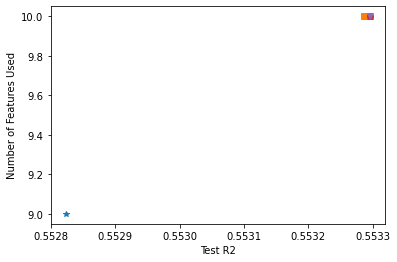

In [263]:
import matplotlib.pyplot as plt
plt.plot(0.5528228155931343,9, '*', label="Lasso alpha=0.1")
plt.plot(0.5532865691965181,10, 's', label="Lasso alpha=0.01")
plt.plot(0.553295953658655,10, '^', label="Lasso alpha=0.001")
plt.plot(0.5532960475383955,10, 'o', label="Lasso alpha=0.0001")
plt.plot(0.5532960484772728,10, 'v', label="Lasso alpha=0.00001")
plt.xlabel("Test R2")
plt.ylabel("Number of Features Used")

10. Choose the regularization parameter for the Lasso using cross-validation
on the training set. Train the Lasso on the whole training set using the
chosen values of the parameters. Report the resulting training and test
R2 and the number of features used. (As before, you are allowed to use
any scikit-learn functions.)

In [267]:
from sklearn.model_selection import cross_val_score
best_score=0
for alpha in [0.1,0.01,0.001,0.0001,0.00001]:
    #for each combinations of parameter, train an lasso
    lasso=Lasso(alpha=alpha)
    #perform cross-validation
    scores=cross_val_score(lasso,X_scaled,y2_train,cv=5)
    #compute mean cross-validation accuracy
    score=np.mean(scores)
    #if we got a better score, store the score and parameters
    if score>best_score:
        best_score=score
        best_alpha=alpha
#rebuild a model on the full training set
lasso=Lasso(alpha=best_alpha)
lasso.fit(X_scaled,y2_train)
test_score=lasso.score(X_scaled,y2_train)
print("Best score:",best_score)
print("Best parameters alpha:",best_alpha)
print("Test set score with best parameters:",test_score)

Best score: 0.48752405926537284
Best parameters alpha: 0.1
Test set score with best parameters: 0.5193745515942896


11. Implement an inductive conformal predictor as follows:
>(a) Split the training set that you obtained in item 5 into two parts:
the calibration set of size 99 and the rest of the training set (the
training set proper). Use your birthday (in the format DDMM) as
random_state.


test_size=99

In [265]:
X_training_proper,X_calibration,y_training_proper,y_calibration= train_test_split(X_scaled,y2_train,random_state=1602,test_size=99)

(b) Preprocess the training set proper, calibration set, and test set in
the same way using StandardScaler. Namely, fit the scaler to the
training set proper and then use it to transform all three.

In [266]:
scaler=StandardScaler()
#calling fit and transform in sequence (using method chaining)
X_scaled_1=scaler.fit(X_training_proper).transform(X_training_proper)
X_scaled_d1=scaler.fit(X_calibration).transform(X_calibration)
print(X_scaled_1)
print(X_scaled_d1)

[[-1.02787781  1.0440738  -0.13797515 ...  1.46314127  1.25025552
  -0.77626376]
 [ 0.92869958 -0.9577867  -0.20361474 ... -1.5728695  -1.74228064
  -0.34041383]
 [-0.01045757 -0.9577867  -1.3851272  ... -0.05486412 -0.47430913
  -0.5147538 ]
 ...
 [ 0.38085791 -0.9577867   0.4965408  ... -0.7000164  -1.13239714
  -0.5147538 ]
 [ 1.63306744 -0.9577867   0.67157968 ... -0.05486412  1.51595879
  -0.42758381]
 [-1.96703495 -0.9577867   0.54030052 ... -0.81386681 -0.15384553
   0.00826612]]
[[ 1.53079378  0.98994949 -0.56422195 -0.94646328  0.15946244  1.12767123
  -1.31727481  1.57431071 -0.72731155  1.21447689]
 [ 1.30616643  0.98994949 -0.58867815 -0.89489272 -1.35678208 -1.29109397
   0.06924835 -0.89455731 -0.38228444  0.25748316]
 [ 1.15641487 -1.01015254 -0.02618543 -1.89551558  1.64597667  1.69876856
   0.22330648  0.62008565  0.43686992  0.60548088]
 [ 0.78203595 -1.01015254 -0.17292266  0.64452708 -0.91082781 -1.04249866
   1.22468432 -1.65187879 -1.40087745  0.51848145]
 [-1.539

(c) Using the nonconformity measure α = |y − yˆ|, where y is the true
label and ˆy is its prediction given the training set proper, for each test
sample compute the prediction interval for it. Do this for significance
levels 5% and 20%. For each of these significance levels compute:
 the length of the prediction intervals for the test samples
 and the test error rate of your inductive conformal predictor1
.
For computing the predictions ˆy, use the Lasso with parameters chosen by cross-validation on the training set proper